In [1]:
import torch

x = torch.zeros((3,4))


In [4]:
x[0][-5:]

tensor([0., 0., 0., 0.])

In [5]:
d = {'a': [[1,2,3], [3,4,5]]}
d

{'a': [[1, 2, 3], [3, 4, 5]]}

In [23]:
d['a'][0] = [1,2]
d

{'a': [[1, 2], [3, 4, 5]]}

In [22]:
my_dict = {'a': 1, 'b': 2, 'c': 3}
value = next(iter(my_dict.values()))
print(value)  # 输出 1 或 2 或 3

1


In [ ]:
lengths = [3, 32, 15, 7]
num_tokens_to_remove = 20
while num_tokens_to_remove:
    

In [124]:
import numpy as np
import time

num = 50000

start = time.time()

for _ in range(num):
    lengths = [312, 267]
    num_tokens_to_remove = 50
    lengths_waiting_to_trunc = [lengths[i] for i in [0,1]]
    for _ in range(num_tokens_to_remove):
        index_max = lengths_waiting_to_trunc.index(max(lengths_waiting_to_trunc))
        lengths_waiting_to_trunc[index_max] -= 1
end = time.time()

print(end-start)
print(lengths_waiting_to_trunc)


0.9324193000793457
[264, 265]


In [121]:
import numpy as np
import time


def argmax(l: list):
    max_value_idx = 0
    max_value = l[0]
    idx = 1
    while idx<len(l):
        if max_value<l[idx]:
            max_value, max_value_idx = l[idx], idx
        idx += 1
    return max_value_idx


lengths = [312, 267]
x = 50
start = time.time()
for _ in range(num):
    lengths = [312, 267]*30
    for _ in range(x):
        max_index = argmax(lengths)
        lengths[max_index] -= 1
end = time.time()

print(end-start)
print(lengths)


7.97226357460022
[310, 267, 310, 267, 310, 267, 310, 267, 310, 267, 310, 267, 310, 267, 310, 267, 310, 267, 310, 267, 310, 267, 310, 267, 310, 267, 310, 267, 310, 267, 310, 267, 310, 267, 310, 267, 310, 267, 310, 267, 311, 267, 311, 267, 311, 267, 311, 267, 311, 267, 311, 267, 311, 267, 311, 267, 311, 267, 311, 267]


In [113]:
import numpy as np
import time

lengths = [312, 267]
x = 50


start = time.time()
for _ in range(num):
    lengths = [312, 267]*3
    for _ in range(x):
        lengths = np.array(lengths)
        max_index = np.argmax(lengths)
        lengths[max_index] -= 1
end = time.time()

print(end-start)
print(lengths)

7.818470001220703
[295 267 295 267 296 267]


In [129]:
def __truncate(tokenized_dict: dict[str, list[list]], waiting_to_trunc_idxs: list, num_tokens_to_remove: int) -> None:
    lengths = [len(value_part) for value_part in tokenized_dict["input_ids"]]
    lengths_waiting_to_trunc = [lengths[i] for i in waiting_to_trunc_idxs]
    for _ in range(num_tokens_to_remove):
        index_max = lengths_waiting_to_trunc.index(max(lengths_waiting_to_trunc))
        lengths_waiting_to_trunc[index_max] -= 1
    print(lengths_waiting_to_trunc)
    for i, j in zip(waiting_to_trunc_idxs, range(len(lengths_waiting_to_trunc))):
        lengths[i] = lengths_waiting_to_trunc[j]
    for value in tokenized_dict.values():
        for i in waiting_to_trunc_idxs:
            value[i] = value[i][: lengths[i]]

cur_dict = {'input_ids':[[1,2,3,4,5], [6,7,8,9,0]], 'ttt': [[5,4,3,2,1], [6,7,8,9,0]]}
__truncate(cur_dict, [0,1], 4)
cur_dict
cur_dict = {key: sum(value, []) for key, value in cur_dict.items()}
cur_dict

[3, 3]


{'input_ids': [1, 2, 3, 6, 7, 8], 'ttt': [5, 4, 3, 6, 7, 8]}

In [1]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')


In [57]:
inputs = tokenizer('hello, how are you. hahahha', add_special_tokens=False)
inputs

{'input_ids': [7592, 1010, 2129, 2024, 2017, 1012, 5292, 3270, 23644, 2050], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [59]:
inputs = dict(inputs)

In [61]:
type(inputs)
inputs

{'input_ids': [7592, 1010, 2129, 2024, 2017, 1012, 5292, 3270, 23644, 2050],
 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [63]:
inputs = tokenizer.pad(inputs)

In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
from toolkit.nlp.dataset import TextDataset
from transformers import AutoTokenizer
import jsonlines

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")


def get_data_from_file(data_file_path, model_type, tokenizer, is_train, **kargs):
    special_tokens_map = tokenizer.special_tokens_map
    BOS = special_tokens_map["bos_token"] if "bos_token" in special_tokens_map.keys() else None
    EOS = special_tokens_map["eos_token"] if "eos_token" in special_tokens_map.keys() else None
    SEP = special_tokens_map["sep_token"] if "sep_token" in special_tokens_map.keys() else None
    MASK = special_tokens_map["mask_token"] if "mask_token" in special_tokens_map.keys() else None
    CLS = special_tokens_map["cls_token"] if "cls_token" in special_tokens_map.keys() else None
    sep_num = 1

    with jsonlines.open(data_file_path, "r") as jlReader:
        dict_objs = list(jlReader)
        if isinstance(dict_objs[0], str):
            dict_objs = dict_objs[1:]

    inputs = []
    labels = []
    for dict_obj in dict_objs:
        inputs.append((dict_obj["question1"], dict_obj["question2"]))
        # input_texts.append(((False, CLS), (True, dict_obj["question1"]), (False, SEP), (True, dict_obj["question2"]), (False, SEP)))
        labels.append([dict_obj["label"]])
        # labels.append(((False, CLS), (True, dict_obj["question1"])))
        # labels.append((dict_obj["question1"], None))
        # labels.append(dict_obj["question1"])
    return inputs, labels


dataset = TextDataset(
    "test/data.jsonl",
    "bert-base-uncased",
    tokenizer,
    load_data_fn=get_data_from_file,
    padding_side="left",
    max_length_input=20,
    max_length_label=22,
    split=True,
)

Tokenize input texts:   0%|          | 0/32 [00:00<?, ?it/s]

In [14]:
print(dataset[1])

{'model_input': {'input_ids': tensor([ 101, 1045, 2215, 2000, 7323, 8065, 1999, 3274, 2671,  102, 1045, 5047,
        2591, 2865, 2005, 1037, 2512, 1011, 5618,  102]), 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])}, 'first_not_pad_index_input': tensor(0), 'labels': tensor([0], dtype=torch.int32)}


In [15]:
print(dataset.max_length_input)
print(dataset.max_length_label)
print(tokenizer.decode(dataset[1]['model_input']['input_ids']))

20
1
[CLS] i want to pursue phd in computer science [SEP] i handle social media for a non - profit [SEP]


In [12]:
from torch.utils.data import DataLoader, default_collate

dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=False, 
                        collate_fn=dataset.collate_fn_padding_right if dataset.padding_side=='right' else dataset.collate_fn_padding_left, 
                        pin_memory=True)

for batch in dataloader:
    print(batch['input_ids'].shape)
    # print(batch['labels'].shape)
    # print(batch['input_ids'].is_pinned())
    # print(batch)
    # break

print(batch)

torch.Size([4, 20])
torch.Size([4, 20])
torch.Size([4, 20])
torch.Size([4, 20])
torch.Size([4, 20])
torch.Size([4, 20])
torch.Size([4, 20])
torch.Size([4, 20])
{'labels': tensor([[  101,  2054,  2024,  1996,  5918,  2000,  2468,  2343,  1999,  1996,
          2142,  2163,  1998,  2129,  2024,  1996,  5918,  2367,  1999, 11959,
          1029,   102],
        [  101,  1000,  2040,  2003,  1996,  4205,  1996,  4581,  2000, 12373,
          1011, 17691,  1005,  1055,  1000,  1000,  4205,  1005,  1055,  2299,
          1000,   102],
        [  101,  2054,  2808,  2323,  1045,  3191,  2004,  2019, 22344, 10670,
          1029,   102,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
          -100,  -100],
        [  101,  2339,  2515,  1037, 10098, 18669, 20553,  2102,  2191,  1037,
          2204,  9004,  1029,   102,  -100,  -100,  -100,  -100,  -100,  -100,
          -100,  -100]]), 'input_ids': tensor([[  101,  2054,  2024,  1996,  5918,  2000,  2468,  2343,  1999,   102,
       

In [234]:
from torch.utils.data import DataLoader, default_collate

default_collate([{'a': torch.tensor([1,2,3]), 'b': torch.tensor([4,5,6]), 'c':'h' 'h'}, {'a': torch.tensor([1,2,3]), 'b': torch.tensor([4,5,6]), 'c':'h' 'h'}])

{'a': tensor([[1, 2, 3],
         [1, 2, 3]]),
 'b': tensor([[4, 5, 6],
         [4, 5, 6]]),
 'c': ['hh', 'hh']}

In [ ]:
from transformers import PretrainedConfig, BertConfig

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from toolkit import ConfigBase
# Config.attribute_alias_map = {'return_dict': 'retrundict'}
t = ConfigBase(return_dict=True)

print(f"self.__dict__: {t.__dict__}")
print(t.to_dict())
print(t.to_diff_dict())
t.return_dict

self.__dict__: {'model_type': '', 'model_name': '', '_name_or_path': '', 'return_dict': True}
{'model_type': '', 'model_name': '', '_name_or_path': '', 'return_dict': True}
{'return_dict': True}


True

In [1]:
from toolkit.nlp import NLPTrainingConfig

kwargs = {
    "dataset":'QQP',
    "early_stop_metric": 'acc',
    "model_type": "bert-base-uncase",
    "model_name": "baseline",
    "epochs": 5,
    "batch_size": 32,
    "learning_rate": 3e-5,
    "a_unknow": 'aaa',
    "max_length_input":256
}
tt = NLPTrainingConfig(**kwargs)
tt.save_pretrained('config')
print(tt.model_type)
tt

2023-06-30 09:21:32,462 -  INFO > toolkit.configuration: Configuration saved in config/train_config.json
32


NLPTrainConfig {
  "a_unknow": "aaa",
  "accumulate_step": 1,
  "adam_epsilon": 1e-08,
  "batch_size": "baseline",
  "dataset": "QQP",
  "early_stop": false,
  "early_stop_metric": "acc",
  "epochs": "bert-base-uncase",
  "fp16": false,
  "learning_rate": 5,
  "max_length_input": 256,
  "max_length_label": null,
  "model_name": 3e-05,
  "model_type": 32,
  "problem_type": null,
  "seed": 0,
  "test_in_epoch": false,
  "warmup": false,
  "warmup_ratio": -1,
  "weight_decay": 0.01
}

In [2]:
tt_load = NLPTrainingConfig.from_pretrained('train_config.json')
print(tt==tt_load)
print(tt_load)
tt.max_length_input is None

2023-06-30 09:21:33,879 -  INFO > toolkit.configuration: loading configuration file config/train_config.json
False
NLPTrainConfig {
  "a_unknow": "aaa",
  "accumulate_step": 1,
  "adam_epsilon": 1e-08,
  "batch_size": 3e-05,
  "dataset": "QQP",
  "early_stop": false,
  "early_stop_metric": "acc",
  "epochs": 32,
  "fp16": false,
  "learning_rate": "bert-base-uncase",
  "max_length_input": 256,
  "max_length_label": null,
  "model_name": 5,
  "model_type": "baseline",
  "problem_type": null,
  "seed": 0,
  "test_in_epoch": false,
  "warmup": false,
  "warmup_ratio": -1,
  "weight_decay": 0.01
}



False

In [29]:
class TrainConfig(ConfigBase):
    model_type='bert'
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.train_return_dict = False
        self.ttt = 1

st = TrainConfig()
print(st.model_type)
st.ttt=2
print(st.to_dict())
print(st.to_diff_dict())

bert
{'_name_or_path': '', 'train_return_dict': False, 'ttt': 2, 'model_type': 'bert'}
base:        {'_name_or_path': '', 'model_type': ''}
class specific: {'_name_or_path': '', 'train_return_dict': False, 'ttt': 1, 'model_type': 'bert'}
{'train_return_dict': False, 'ttt': 2, 'model_type': 'bert'}


In [ ]:
TrainConfig.from_pretrained('')

In [39]:
t.attribute_alias_map

attribute_alias_map


{'return_dict': 'retrundict'}

In [40]:
t.return_dict

return_dict
retrundict


True

In [41]:
t.retrundict

retrundict


True

In [55]:
import os


class Path(os.PathLike):
    def __init__(self, path):
        self.__path = path

    def __fspath__(self):
        return self.__path.replace("/", os.path.sep)

    
path = Path('/home/jjwang/')
print(path.__fspath__())

/home/jjwang/


In [67]:
from pathlib import Path

path = Path('./test/data.jsonl')


In [139]:
import re
text = """
复杂推理是指理解和利用支持证据或逻辑得出结论或做出决定的能力[51,52]。根据推理过程中涉及的逻辑和证据的类型，将现有的评估任务分为知识推理、符号推理和数学推理3大类。

"""

text = re.sub(r'。', '。\n', text)
text = re.sub(r'\(', '（', text)
text = re.sub(r'\)', '）', text)
text = re.sub(r'llm', 'LLM', text)
text = re.sub(r'plm', 'PLM', text)
print(text)



复杂推理是指理解和利用支持证据或逻辑得出结论或做出决定的能力[51,52]。
根据推理过程中涉及的逻辑和证据的类型，将现有的评估任务分为知识推理、符号推理和数学推理3大类。





In [42]:
from pathlib import Path
p = Path('setup.cfg')

In [43]:
p.exists()

True

In [44]:
p.is_file()

True

In [45]:
p.is_dir()

False

In [46]:
'config'/p

PosixPath('config/setup.cfg')

In [ ]:
import os
def check_mem(cuda_device_id: int)->tuple[int,int]:
    """Get total and used memory (unit: `MB`) of GPU with the corresponding ID."""
    devices_info = os.popen('"/usr/bin/nvidia-smi" --query-gpu=memory.total,memory.used --format=csv,nounits,noheader').read().strip().split("\n")
    total, used = devices_info[int(cuda_device_id)].split(",")
    return int(total), int(used)

check_mem(0)

# 函数设计

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import math
import random
random.seed(1)

def log_func(x, n):
    n = torch.tensor(n)
    return torch.log(x)/torch.log(n)


# def randomcolor():
#     colorArr = [ '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F' ]
#     color = ""
#     for i in range (6):
#         color += colorArr[random.randint (0, 14)]
#     return "#" +color


def randomcolor():
    colorArr = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F' ]
    color = ""
    for i in range(6):
        color += colorArr[random.randint(0, 15)]
    return "#"+color


# plt.rc('font',family='HYZhengYuan')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

logits = torch.tensor([list(np.linspace(-10, 10, 1000, endpoint=True))], dtype=torch.float).T
labels_pos = torch.ones((logits.shape[0], 1), dtype=int)
labels_neg = torch.zeros((logits.shape[0], 1), dtype=int)
y = torch.sigmoid(logits).detach()



# # ----------------------------------------------------------------------------------------------------
# alpha = -0.5
# beta = 10
# weight_loss1 = torch.ones((logits.shape[0], 1), device=logits.device)
# already_classable = ((logits>0)==labels).squeeze()
# weight_loss1[already_classable] = torch.sigmoid(((abs(labels-y).detach()+alpha)[already_classable])*beta)
# ----------------------------------------------------------------------------------------------------
alpha = 0
beta = 2
gama = 0.9
delta = 1-gama
weight_loss2_10 = torch.ones((logits.shape[0], 1), device=logits.device)
already_classable = ((logits>0)==labels_pos).squeeze()
x = ((abs(labels_pos-y).detach()+alpha)*beta)[already_classable]*gama  # x: [game, 0]
# print(x[0], x[-1])
x = gama-x+delta
# print(x[0], x[-1])
# weight_loss2[already_classable] = torch.log(((abs(labels-y).detach()+alpha)[already_classable])*beta)+1
weight_loss2_10[already_classable] = -torch.log10(x)
# ----------------------------------------------------------------------------------------------------
alpha = 0
beta = 2
gama = 0.5
delta = 1-gama
weight_loss2_2 = torch.ones((logits.shape[0], 1), device=logits.device)
already_classable = ((logits>0)==labels_pos).squeeze()
x = ((abs(labels_pos-y).detach()+alpha)*beta)[already_classable]*gama  # x: [game, 0]
# print(x[0], x[-1])
x = gama-x+delta
# print(x[0], x[-1])
# weight_loss2[already_classable] = torch.log(((abs(labels-y).detach()+alpha)[already_classable])*beta)+1
weight_loss2_2[already_classable] = -torch.log2(x)
# ----------------------------------------------------------------------------------------------------
# base=100

# alpha = 0
# beta = 2
# gama = 1-1/base
# delta = 1-gama
# weight_loss2_n = torch.ones((logits.shape[0], 1), device=logits.device)
# already_classable = ((logits>0)==labels).squeeze()
# x = ((abs(labels-y).detach()+alpha)*beta)[already_classable]*gama  # x: [game, 0]
# # print(x[0], x[-1])
# x = gama-x+delta
# # print(x[0], x[-1])
# # weight_loss2[already_classable] = torch.log(((abs(labels-y).detach()+alpha)[already_classable])*beta)+1
# weight_loss2_n[already_classable] = -log(x, base)

base=1000
def get_weights_loss(logits, labels, base):
    logits = logits.detach()
    labels = labels.detach()
    y = torch.sigmoid(logits)
    gama = 1-1/base
    weight_loss = torch.ones((logits.shape[0], 1), device=logits.device)
    already_classable = ((logits>0)==labels.bool()).squeeze()
    x = (abs(labels-y)*2)[already_classable]*(gama)  # x: [game, 0]
    x = 1-x
    weight_loss[already_classable] = -log_func(x, base)
    return weight_loss
weight_loss2_n = get_weights_loss(logits, labels_pos, base)
# ----------------------------------------------------------------------------------------------------
# alpha = 0
# beta = 2
# gama = 5
# weight_loss3 = torch.ones((logits.shape[0], 1), device=logits.device)
# already_classable = ((logits>0)==labels).squeeze()
# x = ((abs(labels-y).detach()+alpha)*beta)[already_classable]*gama
# weight_loss3[already_classable] = -(torch.tanh(gama-x))+1
# # ----------------------------------------------------------------------------------------------------




import matplotlib.pyplot as plt
import seaborn as sns

# Increase font size
plt.rcParams.update({'font.size': 15})

# Use consistent line width and style
line_style = {'linewidth': 1.25, 'linestyle': '-'}
plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.serif'] = ['CMU Serif'] + plt.rcParams['font.serif']
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['lines.linewidth'] = 1.25

# Use a pastel color scheme
# colors = sns.color_palette('husl', 4)
colors = sns.color_palette("Greens", 4)
# colors = sns.dark_palette("Greens", 4, reverse=True)
# colors = sns.dark_palette("deep", 4, reverse=True)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4), dpi=300)

# Plot the positive labels
for i, log in enumerate([2, 10, 100, 1000]):
    ax1.plot(y, get_weights_loss(logits, labels_pos, log), color=colors[i], label=f'log {log}', **line_style)

# # Improve axis labels
# ax1.set_xlabel('Probability of prediction')
# ax1.set_ylabel('Weight')

# # Simplify the legend
# ax1.legend(loc='upper right', frameon=False)

# Plot the negative labels
for i, log in enumerate([2, 10, 100, 1000]):
    ax2.plot(y, get_weights_loss(logits, labels_neg, log), color=colors[i], label=f'log {log}', **line_style)

# # Improve axis labels
# ax2.set_xlabel('Probability of prediction')
# ax2.set_ylabel('Weight')

# # Simplify the legend
# ax2.legend(loc='upper left', frameon=False)

# Remove top and right borders
for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Increase line width of remaining borders
for ax in [ax1, ax2]:
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

# Add a title
# fig.suptitle('Weighted Loss vs Probability of Prediction')

# Add a grid
for ax in [ax1, ax2]:
    ax.grid(True, linestyle='-', alpha=0.8)
    # ax.grid(axis='y', linestyle=':', alpha=0.7)

# Improve axis labels
for ax in [ax1, ax2]:
    ax.set_xlabel('Probability of prediction')
    ax.set_ylabel('Weight')

for ax in [ax1, ax2]:
    ax.legend(loc='best', frameon=False)

# Adjust aspect ratio
fig.subplots_adjust(wspace=0.3)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
fig.savefig("function.eps", format='eps', bbox_inches='tight', dpi=300)

# 折线图

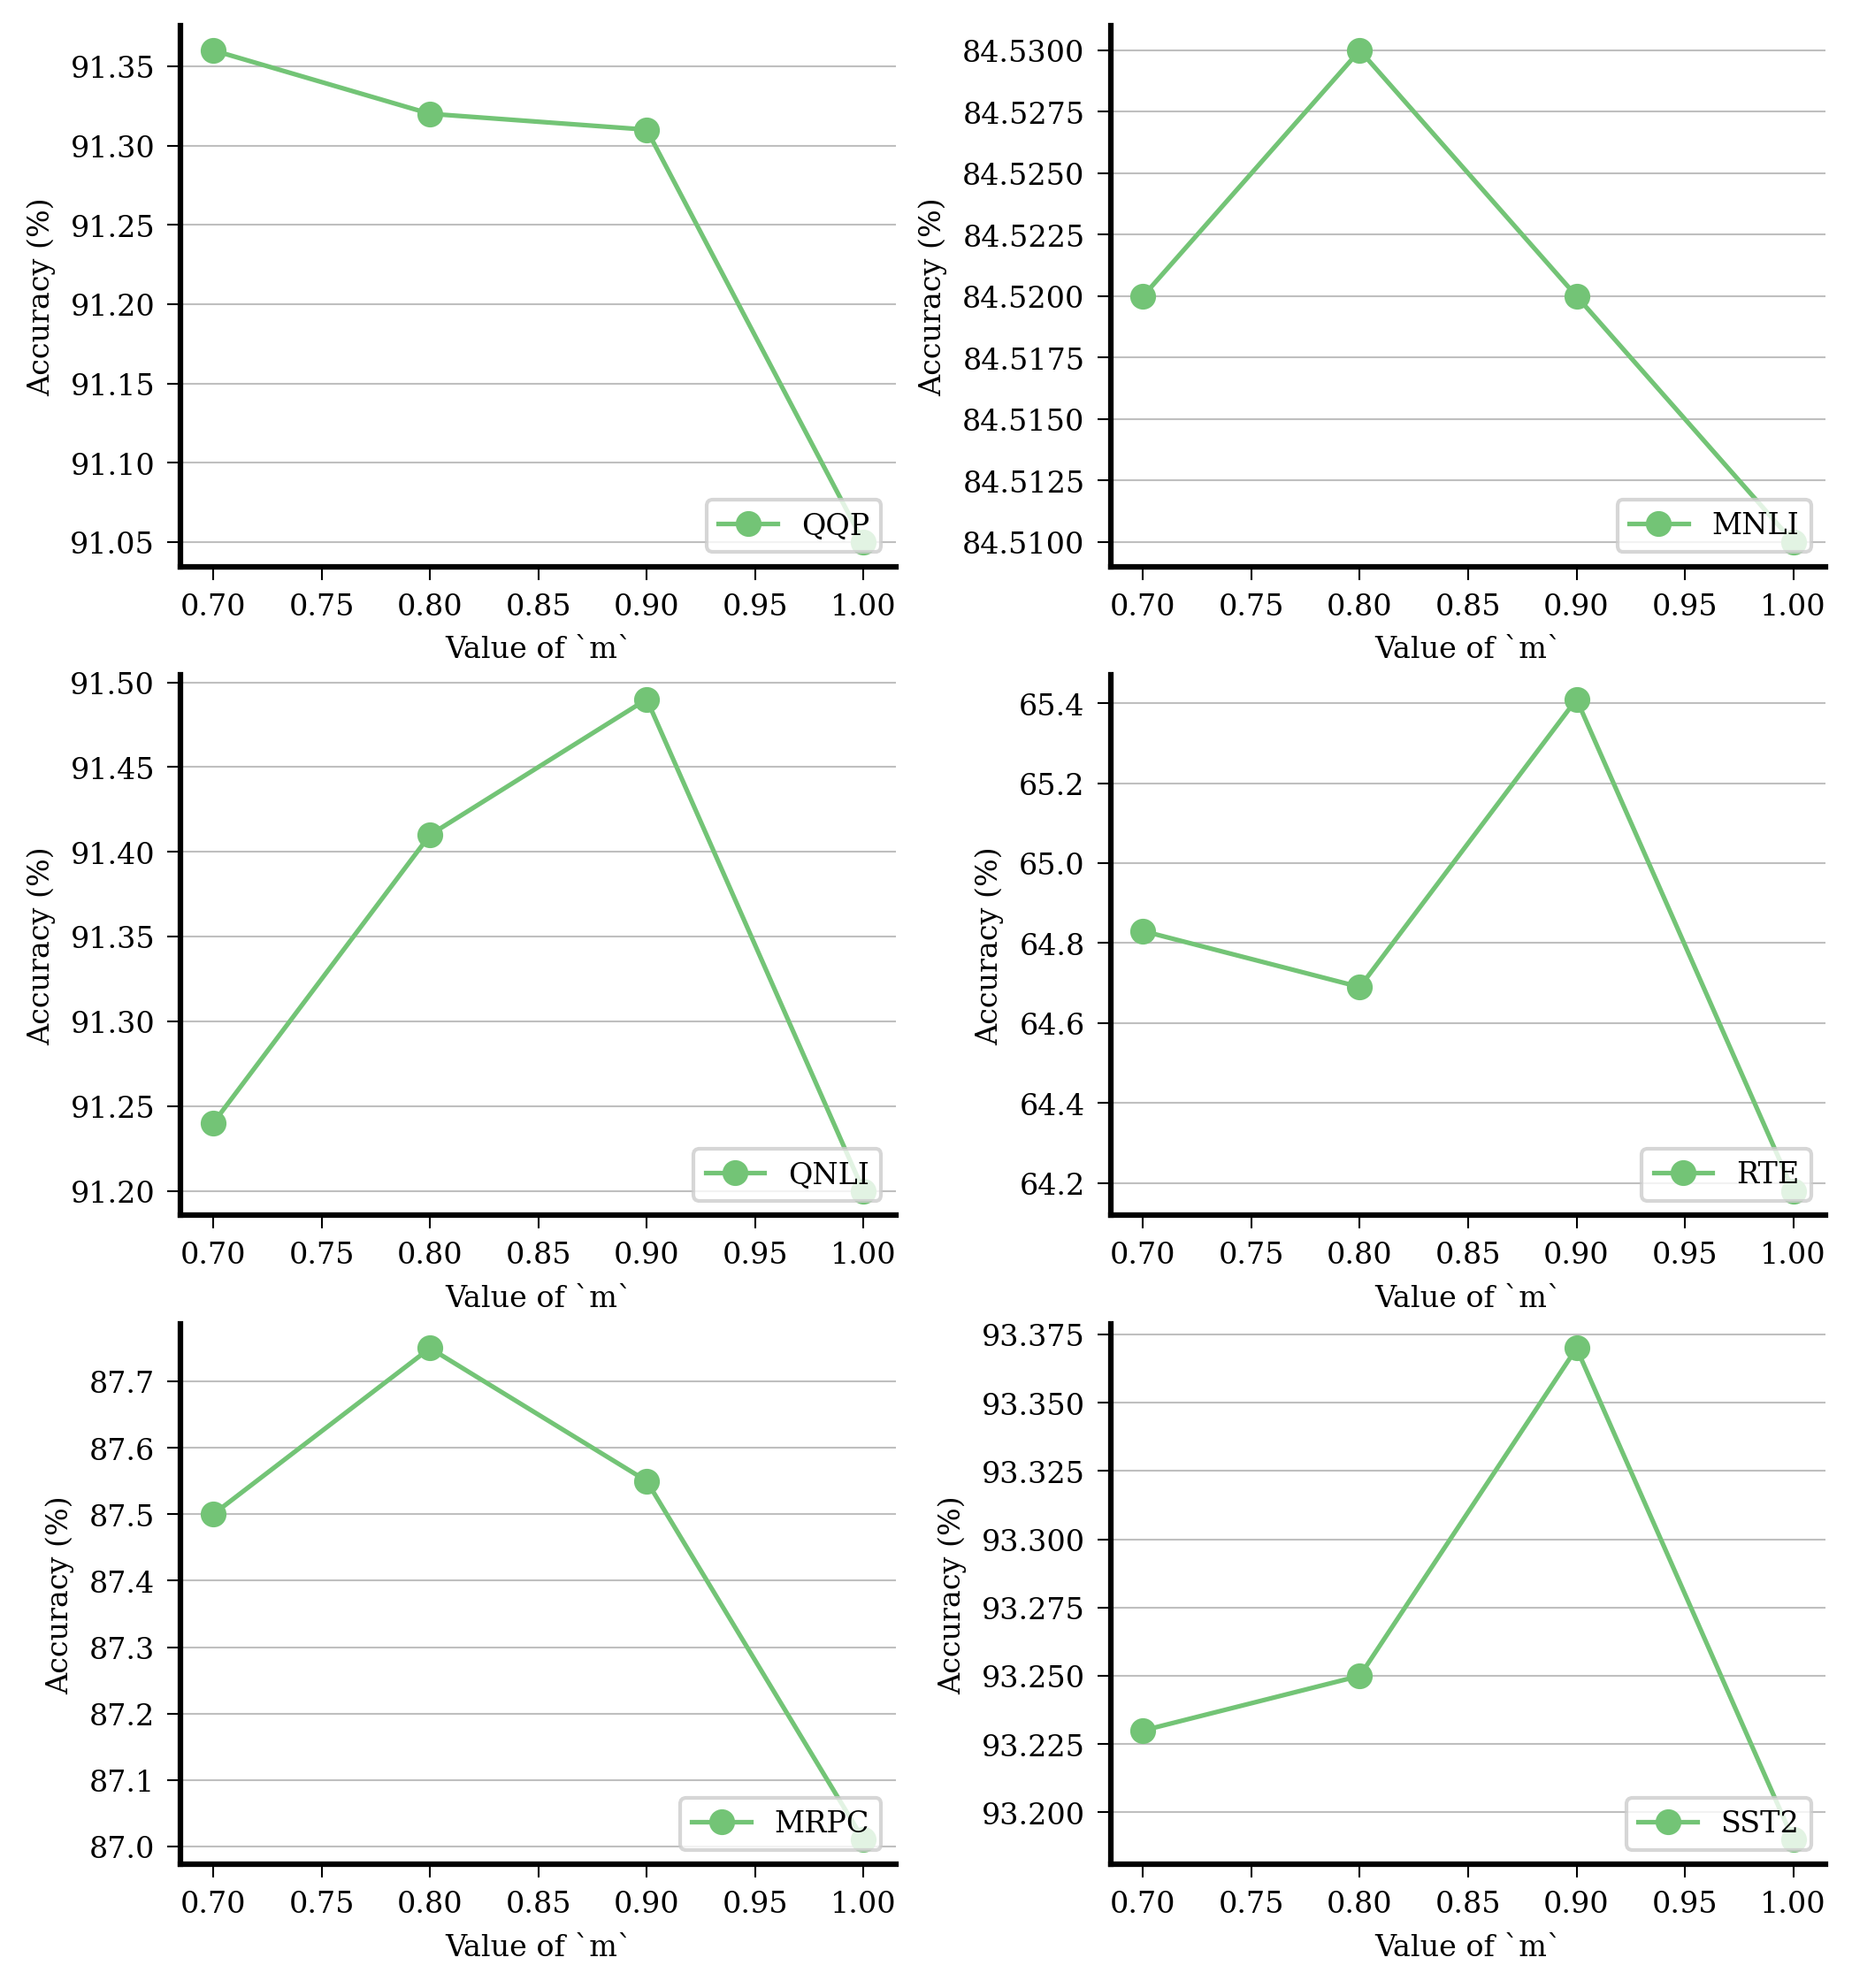

In [4]:
from toolkit.utils.draw import LineChart

lc = LineChart(3, 2, figsize=(8, 9))

x = [[((0.7, 0.8, 0.9, 1.0),) for _ in range(2)] for _ in range(3)]
y = [
    [((91.36, 91.32, 91.31, 91.05),), ((84.52, 84.53, 84.52, 84.51),)],
    [((91.24, 91.41, 91.49, 91.20),), ((64.83, 64.69, 65.41, 64.18),)],
    [((87.50, 87.75, 87.55, 87.01),), ((93.23, 93.25, 93.37, 93.19),)],
]
line_label = [[("QQP",), ("MNLI",)], [("QNLI",), ("RTE",)], [("MRPC",), ("SST2",)]]

lc.draw(x, y, "Value of `m`", "Accuracy (%)", line_label)

In [6]:
lc.save('value_of_m', save_dir='test', bbox_inches=None, form='png')

['Times New Roman', 'Times New Roman', 'DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Times New Roman', 'Times', 'Palatino', 'Charter', 'serif']


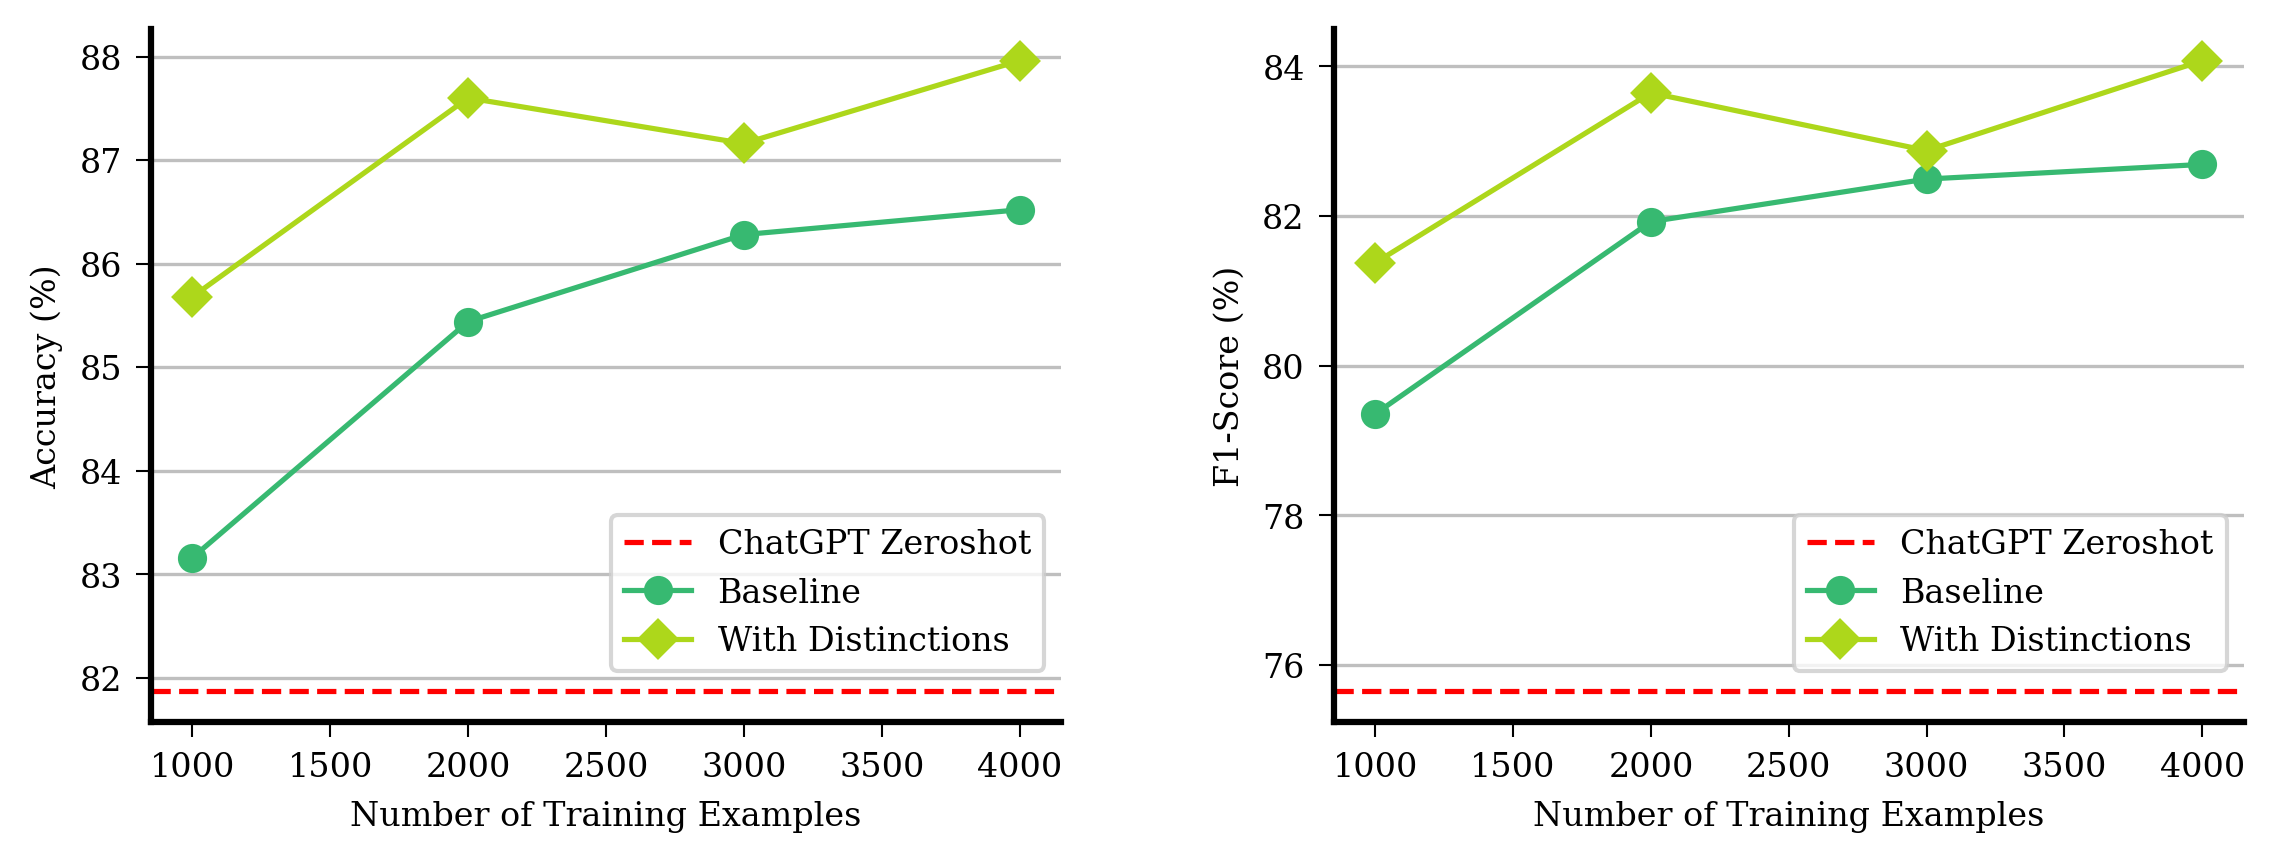

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
# 数据
x = [i*1000 for i in range(1,5)]
baseline_no_prompt_acc_mean_5 = [83.63999938964844,84.23999938964843,86.2,86.64000091552734]
baseline_acc_mean_5 = [83.15999908447266,85.44000091552735,86.28000183105469,86.51999969482422]
ensemble_acc_mean_5 = [85.68000183105468,87.6,87.16000061035156,87.96000061035156]
baseline_no_prompt_f1_mean_5 = [79.65749969482422,80.31880798339844,82.51792449951172,82.95933532714844]
baseline_f1_mean_5 = [79.35353546142578,81.92408599853516,82.49300231933594,82.68881683349609]
ensemble_f1_mean_5 = [81.37353973388672,83.64531707763672,82.87378692626953,84.07548522949219]


# 设置图形参数
# font = FontProperties(fname='/home/jjwang/.fonts/cmunrm.ttf')
# plt.rcParams['font.family'] = font.get_name()
plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.serif'] = ['CMU Serif'] + plt.rcParams['font.serif']
# plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
print(plt.rcParams['font.serif'])
# plt.rc('font', family='CMU Serif')
plt.rcParams['font.size'] = 8
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['lines.linewidth'] = 1.25


# Use a pastel color scheme
colors = sns.color_palette("Spectral", 2)
colors = sns.color_palette("husl", 2)
colors2 = sns.color_palette("Greens", 2)
colors = [colors[1], colors2[1]]
colors = ['#37B971', '#ADD71B']
# colors = sns.dark_palette("Greens", 4, reverse=True)
# colors = sns.dark_palette("deep", 4, reverse=True)


# 创建图形
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 3), dpi=300)

# 绘制Accuracy子图
# ax1.plot(x, baseline_no_prompt_acc_mean_5, 'v-', color='tab:red', label='Baseline_no_prompt')
# ax1.plot(x, baseline_acc_mean_5, 'o-', color='tab:blue', label='Baseline')
# ax1.plot(x, ensemble_acc_mean_5, 'D-', color='tab:green', label='With describe')
ax1.axhline(y=81.875, linestyle='--', color='red', label='ChatGPT Zeroshot')
ax1.plot(x, baseline_acc_mean_5, 'o-', color=colors[0], label='Baseline')
ax1.plot(x, ensemble_acc_mean_5, 'D-', color=colors[1], label='With Distinctions')
ax1.set_xlabel('Number of Training Examples')
ax1.set_ylabel('Accuracy (%)')
# ax1.legend(loc='lower right')
# ax1.grid(axis='y', linestyle='-', alpha=0.8)
# 绘制F1-Score子图
# ax2.plot(x, baseline_no_prompt_f1_mean_5, 'v-', color='tab:red', label='Baseline_no_prompt')
ax2.axhline(y=75.65480188045667, linestyle='--', color='red', label='ChatGPT Zeroshot')
ax2.plot(x, baseline_f1_mean_5, 'o-', color=colors[0], label='Baseline')
ax2.plot(x, ensemble_f1_mean_5, 'D-', color=colors[1], label='With Distinctions')
ax2.set_xlabel('Number of Training Examples')
ax2.set_ylabel('F1-Score (%)')
# ax2.legend(loc='lower right')
# ax2.grid(axis='y', linestyle='-', alpha=0.8)
# 调整子图间距和布局
fig.subplots_adjust(wspace=0.3)

for ax in (ax1, ax2):
    ax.grid(axis='y', linestyle='-', alpha=0.8)
    ax.legend(loc='lower right', bbox_to_anchor=(1, 0.05))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ax.spines['bottom'].set_linewidth(2)
    # ax.spines['left'].set_linewidth(2)
# 保存图形
# fig.savefig('subplots.pdf', dpi=300, bbox_inches='tight')

In [ ]:
fig.savefig("gpt.eps", format='eps', bbox_inches='tight', dpi=300)

# Rouge-L

In [ ]:
from torchmetrics.functional.text.rouge import rouge_score


all_rougeL = []
neg_rougel = []
pos_rougel = []
lines = [
    '头发多适合剪短发吗   头发少适合剪短吗    0', 
    '今天北京下雨了吗   今天北京会下雨吗    0', 
    '刚出生的小野鸡怎么养   刚抓来的野鸡怎么养    0', 
    '刚出生的小野鸡怎么养	刚抓来的野鸡怎么养殖  0', 
    '温州有什么好玩的地方？ 温州什么地方最好玩  0',
    '今晚吃什么    篮球好玩吗   0', 
    '这姑娘漂亮不   我姑娘漂亮吧    0', 
    '意大利面怎么做   意大利面怎么煮的快  0', 
    '瞻仰的瞻是什么意思   瞻仰的仰是什么意思？！ 0', 
    '仰望的仰是什么意思   瞻仰的仰是什么意思 0', 
    '赵县梨花什么时候开 赵县梨花节什么时候啊？ 0', 
    '晚安日语怎么写？ 晚安用日语怎么说 0',
    ]


for line in lines:
    s1, s2, label = line.split()
    lable = int(label)
    rougeL = rouge_score(s1, s2, rouge_keys='rougeL', tokenizer=list, normalizer=lambda x: x)['rougeL_fmeasure'].item()
    all_rougeL.append(rougeL)
    if lable==1:
        pos_rougel.append(rougeL)
    else:
        neg_rougel.append(rougeL)
    print(f"{s1}\t{s2}\t{rougeL}")

In [ ]:
import Levenshtein

lines = [
    '头发多适合剪短发吗   头发少适合剪短吗    0', 
    '今天北京下雨了吗   今天北京会下雨吗    0', 
    '刚出生的小野鸡怎么养   刚抓来的野鸡怎么养    0', 
    '刚出生的小野鸡怎么养	刚抓来的野鸡怎么养殖  0', 
    '温州有什么好玩的地方？ 温州什么地方最好玩  0',
    '今晚吃什么    篮球好玩吗   0', 
    '这姑娘漂亮不   我姑娘漂亮吧    0', 
    '意大利面怎么做   意大利面怎么煮的快  0', 
    '瞻仰的瞻是什么意思   瞻仰的仰是什么意思？！ 0', 
    '仰望的仰是什么意思   瞻仰的仰是什么意思 0', 
    '赵县梨花什么时候开 赵县梨花节什么时候啊？ 0', 
    '晚安日语怎么写？ 晚安用日语怎么说 0',
    ]


all_lr = []
neg_lr = []
pos_lr = []

for line in lines:
    s1, s2, label = line.split()
    lable = int(label)
    lr = Levenshtein.ratio(s1, s2)
    all_lr.append(lr)
    if lable==1:
        pos_lr.append(lr)
    else:
        neg_lr.append(lr)
    print(f"{s1}\t{s2}\t{lr}")

# 数据集

In [ ]:
from datasets import load_dataset

dataset_name = 'qnli'
dataset = load_dataset("glue", dataset_name)
# you can use any of the following config names as a second argument:
"ax", "cola", "mnli", "mnli_matched", 
"mnli_mismatched", "mrpc", "qnli", "qqp", 
"rte", "sst2", "stsb", "wnli"

from pprint import pprint

print(dataset)

for key in dataset['train'].features.keys():
    pprint(f"{key}: {dataset['train'][key][:10]}")



In [ ]:
import jsonlines
import os
from tqdm.auto import trange
dataset_name = dataset_name.upper()
splits = dataset.keys()
# split = 'validation'
for split in splits:
    output_path = f"data/{dataset_name}/{split}"
    os.makedirs(output_path, exist_ok=True)
    with jsonlines.open(os.path.join(output_path, 'all.jsonl'), 'w') as jlWriter:
        objs = []
        keys = list(dataset[split].features.keys())
        data_dict = {key:dataset[split][key] for key in keys}
        for i in trange(dataset[split].num_rows):
            objs.append({key:data_dict[key][i] for key in keys})
        jlWriter.write_all(objs)


In [3]:
from typing import Any, List, Tuple, Union

def get_data_types(data: Union[List, Tuple, Any]) -> Union[type, List, Tuple]:
    """
    获取一个嵌套结构中的所有数据类型，并保留嵌套结构
    """
    if isinstance(data, dict):
        return {k: get_data_types(v) for k, v in data.items()}
    elif isinstance(data, list):
        return [get_data_types(item) for item in data]
    elif isinstance(data, tuple):
        return tuple(get_data_types(item) for item in data)
    else:
        return type(data)
    
data = {'a':[(1, 2), (3, 4)], 'b':[1,2,3]}
get_data_types(data)


{'a': [(int, int), (int, int)], 'b': [int, int, int]}

In [28]:
from typing import Any, List, Tuple, Dict

def type_to_str(data):
    return str(type(data))[8:-2]
def get_data_types(data: List| Tuple| Any) -> str|Dict[Any,str]:
    """
    获取一个嵌套结构中的所有数据类型，并保留嵌套结构
    """
    if isinstance(data, dict):
        return {k: get_data_types(v) for k, v in data.items()}
    elif isinstance(data, list):
        return f"List[{', '.join([get_data_types(item) for item in data])}]"
    elif isinstance(data, tuple):
        return f"Tuple[{', '.join([get_data_types(item) for item in data])}]"
    else:
        return type_to_str(data)
    
data = {'a':[(1, 2), (3, 4)], 'b':[1,2,3]}
# data = [(1, 2), (3, 4)]
# data = [1,2,3]
print(get_data_types(data))


{'a': 'List[Tuple[int, int], Tuple[int, int]]', 'b': 'List[int, int, int]'}


In [18]:

def type_to_str(data):
    return str(type(data))[8:-2]

In [29]:
type_to_str(None)

'NoneType'

In [16]:
import torch
x = torch.ones((100, 64, 128))
print(x.shape)
x = x.view((25,4,64,128))
print(x.shape)

torch.Size([100, 64, 128])
torch.Size([25, 4, 64, 128])


In [26]:
from transformers import PretrainedConfig, BertConfig

x


In [30]:
from toolkit.nlp.enums import Split

print(str(Split.TRAINING))

Split.training
Split.training


In [11]:
import re

text = """
另一类由MIXUP (Zhang et al.， 2017)首创的数据挖掘技术，对两个或多个真实示例的输入和标签进行插值。这类技术有时也被称为混合样本数据增强(MSDA)。随后的工作探索了内部分量的插值(Verma等人，2019;Faramarzi等人，2020)，更通用的混合方案(Guo, 2020)，以及添加对手(Beckham等人，2019)。


"""
text = re.sub(r"，\s*", ', ', text)
text = re.sub(r"。\s*", '. ', text)
print(text)


另一类由MIXUP (Zhang et al., 2017)首创的数据挖掘技术, 对两个或多个真实示例的输入和标签进行插值. 这类技术有时也被称为混合样本数据增强(MSDA). 随后的工作探索了内部分量的插值(Verma等人, 2019;Faramarzi等人, 2020), 更通用的混合方案(Guo, 2020), 以及添加对手(Beckham等人, 2019). 


In [1]:
from toolkit.utils.training import Scaler
from torch.cuda.amp import GradScaler

scaler = Scaler(GradScaler())
# scaler.save('./test/')

In [2]:
scaler.load('./test/', 'a')

FileNotFoundError: [Errno 2] No such file or directory: 'test/a'

In [10]:
scaler.update()

AssertionError: Attempted update but _scale is None.  This may indicate your script did not use scaler.scale(loss or outputs) earlier in the iteration.